# <font color='red'><center> Machine learning: supervised algorithm part 1</center> </font>

We will explore a simple dataset `Iris dataset` which can be described by the following properties:
- Balanced dataset: it is very important to check this property when dealing with classification problem.
- No missing data.
- 150 samples and 4 numeric features with the same units.
This can reduce the time of preprocessing compared to the first tutorial and let us focus more on the machine learning models.

## <font color='Green'> <center>Data analysis</center></font>

In [2]:
import pandas as pd
import numpy as np

# Plotting tool
import matplotlib.pyplot as plt
import seaborn as sns
# to display all the columns in the DataFrame in the notebook 
pd.pandas.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# set off warning
import warnings
warnings.simplefilter(action='ignore')

In [3]:
# download data from UCI https://archive.ics.uci.edu/ml/datasets/iris
data = pd.read_csv('./iris.data')
data.shape
data.head()

5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa

**Note**:
We remark that the dataset is not correctly loaded. The first line considered as the columns names. This is because the `iris.data` is not a csv file and we don't specify the `names` parameter in the `read_csv()`.

In the data descritpion, we identify the features names:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
    - Iris Setosa  
    - Iris Versicolour  
    - Iris Virginica  

In [4]:
header = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data = pd.read_csv('iris.data', names=header)
data.shape
data.head()

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [5]:
# check the missing data
var_with_na = [var for var in data.columns if data[var].isnull().sum()>0]
print(var_with_na)

[]


In [5]:
classes = data['class'].unique()
print(classes)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [6]:
# check the categorical features
# We see that all features are numerics
data.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [7]:
# data statistics
data.describe()

sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [8]:
# Check the class distribution
# The data is perfectly balanced (which is not the case in the real world)
data.groupby('class').count()

sepal length  sepal width  petal length  petal width
class                                                                
Iris-setosa                50           50            50           50
Iris-versicolor            50           50            50           50
Iris-virginica             50           50            50           50

In [9]:
# plot features distribution
# we can use plt.subplots to plot figures side by side
cols = list(data.columns)[:-1]

# ax[1,1] = sns.distplot(data[cols[0]])

fig, ax = plt.subplots(2,2,  sharey=True, sharex=False, figsize=(10,10))
sns.distplot(data[cols[0]], ax=ax[0,0])
ax[0,0].set(xlabel=cols[0])
sns.distplot(data[cols[1]], ax=ax[0,1])
ax[0,1].set(xlabel=cols[1])
sns.distplot(data[cols[2]], ax=ax[1,0])
ax[1,0].set(xlabel=cols[2])
sns.distplot(data[cols[3]], ax=ax[1,1])
ax[1,1].set(xlabel=cols[3])
fig.show()

(From wikipidea):

A boxplot is a standardized way of displaying the dataset based on a five-number summary: `the minimum`, `the maximum`, `the sample median`, and `the first` and `third quartiles`.

- Minimum : the lowest data point excluding any outliers.

- Maximum : the largest data point excluding any outliers.

- Median (Q2 / 50th percentile) : the middle value of the dataset.

- First quartile (Q1 / 25th percentile) : also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

- Third quartile (Q3 / 75th percentile) : also known as the upper quartile qn(0.75), is the median of the upper half of the dataset
Here is a good explanation for box plot https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

Usually, boxplot is used to display the distribution of the data and detect the outliers which may be plotted as individual points. 

In [10]:
# We can use seaborn, pandas or matplotlib to plot a boxplot
boxplot = data.boxplot(column=cols, by='class', figsize=(10, 10))

**Notes**

We can see that the group appears in the first plt seems correspond to `Iris-setosa` class

**Notes**

From the above distributions, we can see that both `petal length` and `petal width` distributions are bi-modal(i.e. one group of data have smaller values than the other). So, there might be different groups in the data.

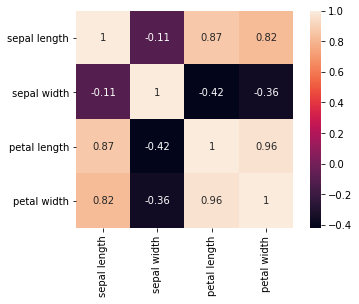

In [11]:
# We can examine the relationships between the features using the matrix correlation
corrmat = data.corr()
sns.heatmap(corrmat, annot = True, square = True);

**Note**

- Petal widh and height features are very correlated.
- Sepal widh and height features are uncorrelated.
- Petal widh and height features are correlated with sepal length.

## <font color='Green'> <center>Feature enginerring</center></font>

In [12]:
data.head()

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

**Notes**

The first thing to do is to split the data into train and test. For feature engineering, we don't have much operations. We will just scale the data.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['class'], axis=1),
                                                    data['class'],
                                                    stratify=data['class'],
                                                    test_size=0.15,
                                                   random_state = 0)


print(X_train.shape)
print(X_test.shape)

(127, 4)
(23, 4)


In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## <font color='Green'> <center>Building machine learning model</center></font>

### Logistic Regression:
- Some regression algorithm can be used for classification as well and vice versa.
- Logistic regression is commonly used to estimate the probability that an instance belongs to a particular class.
- Logistic regression train the same model as linear regression.
- Instead of outputting the result directly, it apply the sigmoid function on this result to output the logistic. The sigmoid function is given by the following equation: 
$\sigma(t) = \frac{1}{1 + exp(-t)}$ 
<center><img src="../assets/sigmoid.png" width="600"></center>
- The output of the sigmoid function is in [0, 1]. 
- The prediction rule for a binary classification by thresholding the prob.
- $\hat p <0.5  $, the instance belongs to class 0. $\hat p>=0.5$, the instance belongs to class 1 
- If we have a multi-class (more than two classes) classification, we apply the softmax regression.
- The idea is simple: for an instance x , the softmax regression model first computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the softmax function.
- softmax function : $\frac{exp(s_k(x)}{\sum_{j=1}^K exp(s_j(x))}$

*Read pages 140 -150*


In [10]:
# In this section, we will try different machine learning models.

from sklearn.linear_model import LogisticRegression
from  sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC, SVC
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

### Logistic regression

In [11]:
logistic_reg = LogisticRegression(C=1, random_state=123, n_jobs=-1, verbose=1)
logistic_reg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(C=1, n_jobs=-1, random_state=123, verbose=1)

Test accuracy: 0.9565217391304348


Text(0.5, 1.0, 'Logistic regression Confusion matrix, without normalization')

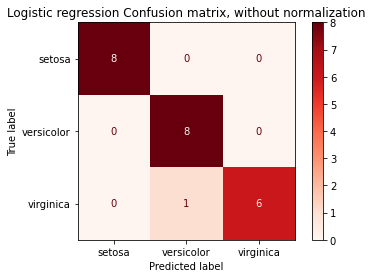

In [17]:
# Test accuracy
# Since the dataset is balanced, the accuracy metric is convenient

y_pred = logistic_reg.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {acc_test}')

# Confusion matrix
disp = plot_confusion_matrix(logistic_reg, X_test, y_test,
                                 display_labels=['setosa', 'versicolor', 'virginica'],
                                 cmap=plt.cm.Reds,
                                 normalize=None)
disp.ax_.set_title('Logistic regression Confusion matrix, without normalization')

In [18]:
# features importance n_classes x n_features
logistic_reg.coef_

array([[-1.011292  ,  1.08972756, -1.81910518, -1.73799659],
       [ 0.51975107, -0.38233253, -0.13780796, -0.86248531],
       [ 0.49154092, -0.70739504,  1.95691314,  2.6004819 ]])

### Support vector machine
#### Linear SVM classification:
- The fundamental idea behind SVM can be explained by the following figure:
<center><img src="../assets/linear_svm.png" width="600"></center>

- The left plot shows the decision boundaries of three possible linear models. The model with dashes lines does not perform well.
- The other two models learn  perfectly on the train data, but their decisions boundaries are very close from the instances.
- `These models probably not generalize well on unseen data`
- The right plot shows a decision boundary of an SVM classifier. The `Solid line` not only separate the instances but also stay away from them.
- Fitting an svm classifier can be seen as fitting the widest street(`parallel dashed lines`) between the classes. This is called `large margin classification`.
- If we strictly impose that all instances of one class be off the street and on the right/left side, this is called `hard margin classification`.
- Hard margin classification can work only if the data is `linearly separable`, and it is so `sensitive to outliers` as depicted below:
<center><img src="../assets/hard_margin.png" width="600"></center>

**Soft margin classification**
- To avoid the limitation of hard margin classification by using more flexible model.
-  The goal is to keeping the `street` as large as possible and limiting the margin violation (i.e. instances that fall in the middile of the `street` or even in the wrong side.)
- In scikit-learn we can implement the Linear SVM using the `LinearSVC` estimator and control the margin using `C` parameter. 
- We can use `SGDClassifier()` estimator to handle  large datasets.
- SVM is scaling invariant and we should normalize data (StandardScaler()).


#### Non Linear SVM:
- Linear SVM is efficient and can work in many cases.
- Many dataset are complex and not close to being linearly separable.
- One solution to deal with nonlinear datasets, is to add features as in the example below.
<center><img src="../assets/add_features.png" width="600"></center>
- Generate polynomial features is simple to implement and work well with all machine learning algorithms. However, with low degree, it cannot deal with complex datasets and with high degree it can creates a huge number of features.
- Using SVM, there is an almost `miraculous` mathematical technique called the `kernel trick`, which gives the same result without creating additional features (no combinatorial explosion of the number of features ).
- The fundamental idea is `mapping the non-linear separable data-set into a higher dimensional space where we can find a hyperplane that can separate the samples`.
- The kernel's trick theory is out of scope here, you find more details here https://towardsdatascience.com/understanding-the-kernel-trick-e0bc6112ef78, https://www.youtube.com/watch?v=wBVSbVktLIY and many more.
- In scikit-learn, this trick is implemented in the SVC estimator.
- Common kernels: 
    - *Gaussian RBF kernel*: $\Phi(X, y) = \exp(-\gamma ||X-Y||^2)$
    - *Polynomial kerenl*: $K(X, Y) = (\gamma X^TY+c)^d$
    - *sigmoid kernel*: $K(X, Y) = \tanh(\gamma.X^TY + r)$
    - *linear kernel*:$K(X, Y) = X^TY$

*See Ref pages chapter 5*


In [19]:
svc_model = LinearSVC(loss='hinge', dual=True, verbose=1)
svc_model.fit(X_train, y_train)

[LibLinear]

LinearSVC(loss='hinge', verbose=1)

Test accuracy: 0.9565217391304348


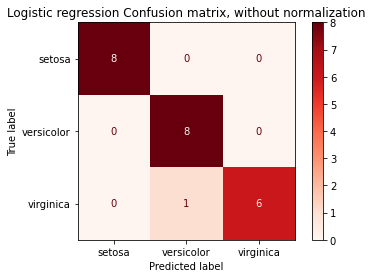

In [20]:
# Test accuracy
# Since the dataset is balanced, the accuracy metric is convenient

y_pred = svc_model.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {acc_test}')

# Confusion matrix
disp = plot_confusion_matrix(svc_model, X_test, y_test,
                                 display_labels=['setosa', 'versicolor', 'virginica'],
                                 cmap=plt.cm.Reds,
                                 normalize=None)
disp.ax_.set_title('Logistic regression Confusion matrix, without normalization')
plt.show()

In [21]:
# Kernel trick and RBF kernel 
svc_model = SVC(kernel='rbf', gamma=0.1,  C=3)
svc_model.fit(X_train, y_train)

SVC(C=3, gamma=0.1)

Test accuracy: 1.0


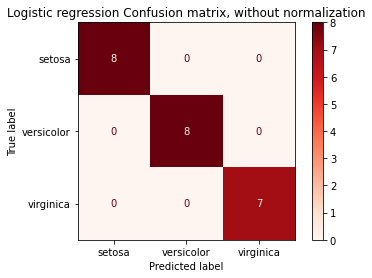

In [22]:
# Test accuracy
# Since the dataset is balanced, the accuracy metric is convenient

y_pred = svc_model.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {acc_test}')

# Confusion matrix
disp = plot_confusion_matrix(svc_model, X_test, y_test,
                                 display_labels=['setosa', 'versicolor', 'virginica'],
                                 cmap=plt.cm.Reds,
                                 normalize=None)
disp.ax_.set_title('Logistic regression Confusion matrix, without normalization')
plt.show()

**Notes**
- Getting the best hyperparameters such as `gamma` and `C` is not easy manually. Fortunatly, scikit-learn  provides tools, to efficiently find the best hyperparameters. These tools is implemented by `GridSearchCV()` and  `RandomizedSearchCV()`. We will detail them in the next session.